<a href="https://colab.research.google.com/github/AngeMervaneJdev/Data-Analysis-Projects-v2/blob/main/Fifa_18_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##FIFA 18 Dataset Analysis Guide
>The FIFA 18 dataset provides statistics for approximately 16,000 players across 70 attributes. This guideline outlines a step-by-step approach to analyze the dataset using Python.




###Step 1: Data Import and Exploration

Use the pandas library to import the dataset from a CSV file.
Inspect the dataset using df.head() and df.info() to understand the structure and data types.
Use df.describe() to generate summary statistics for numerical columns.
###Step 2: Data Cleaning and Preprocessing

Handle missing values using pandas.fillna() or imputer from sklearn.
Convert categorical variables to numerical representations using get_dummies from pandas or LabelEncoder from sklearn.
Normalize or scale numerical columns using StandardScaler from sklearn.
###Step 3: Data Visualization

Use matplotlib and seaborn to visualize distributions, correlations, and relationships between attributes.
Create scatter plots to examine relationships between numerical columns.
Use bar plots to visualize categorical variables.
###Step 4: Feature Selection and Engineering

Identify relevant features using correlation analysis, mutual information, or recursive feature elimination.
Create new features by combining existing ones (e.g., calculating averages or totals).
Remove redundant or irrelevant features.
###Step 5: Modeling and Prediction

Split the dataset into training and testing sets using train_test_split from sklearn.
Implement classification models (e.g., logistic regression, random forests) to predict player positions based on their attributes.
Evaluate model performance using metrics such as accuracy, precision, and recall.
###Step 6: Advanced Analysis

Perform clustering analysis using k-means or hierarchical clustering to group players with similar attributes.
Implement regression models to predict player performance metrics (e.g., goals, assists) based on their attributes.
Use dimensionality reduction techniques (e.g., PCA) to reduce the feature space and identify key drivers of player performance.


## Step1: Data Import and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report

In [2]:
df =  pd.read_csv('CompleteDataset.csv')
df.head()


<ipython-input-2-8983a0e01d6e>:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('CompleteDataset.csv')


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


## Step 2: Data Cleaning and Processing

### Data cleaning

Index(['Club', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM',
       'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object')


<Axes: >

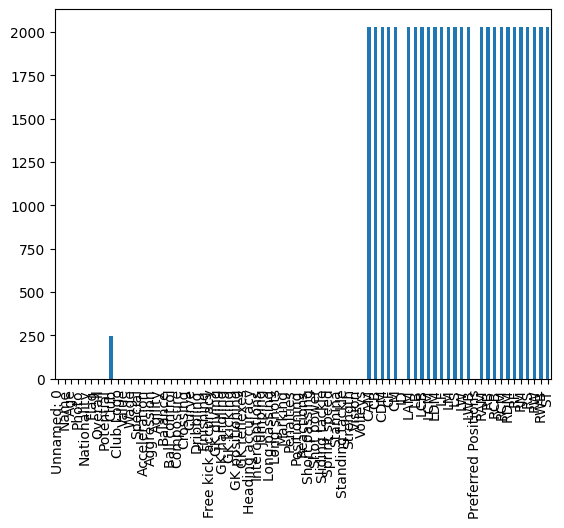

In [4]:
# get the columns where there is a null value
print(df.columns[df.isnull().any()])
df.isnull().sum().plot(kind='bar')

In [5]:
# delete the rows where the club is null
df_clean = df.dropna(subset=['Club'])
print(df_clean.columns[df_clean.isnull().any()])

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF',
       'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')


In [6]:
column_with_null = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF',
       'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST']

# get the row where all the data of the columns in columns_with_null are empty
print(df_clean[df_clean[column_with_null].isnull().all(axis=1)])
#delete the rows where the data of the columns in columns_with_null are null
df_clean = df_clean.dropna(subset=column_with_null)
print(df_clean[df_clean[column_with_null].isnull().all(axis=1)])

       Unnamed: 0           Name  Age  \
4               4       M. Neuer   31   
6               6         De Gea   26   
12             12    T. Courtois   25   
18             18      G. Buffon   39   
20             20       J. Oblak   24   
...           ...            ...  ...   
17945       17945      A. Dillon   20   
17949       17949  M. McElhinney   19   
17951       17951       M. Hurst   21   
17976       17976      A. Kelsey   17   
17977       17977  B. Richardson   47   

                                                 Photo          Nationality  \
4      https://cdn.sofifa.org/48/18/players/167495.png              Germany   
6      https://cdn.sofifa.org/48/18/players/193080.png                Spain   
12     https://cdn.sofifa.org/48/18/players/192119.png              Belgium   
18       https://cdn.sofifa.org/48/18/players/1179.png                Italy   
20     https://cdn.sofifa.org/48/18/players/200389.png             Slovenia   
...                              

(15746, 75)


<Axes: >

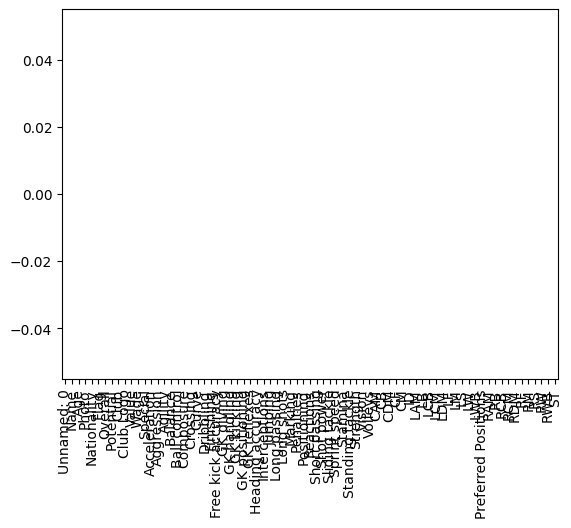

In [7]:
print(df_clean.shape)
df_clean.isnull().sum().plot(kind='bar')

### separate data (categorical and numerical)

In [8]:
# get categorize and numerical columns of df
categorize_columns = df_clean.select_dtypes(include=['object']).columns
numerical_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns")
print(categorize_columns)
print("*"*6)
print("Numerical columns")
print(numerical_columns)


Categorical columns
Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value',
       'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions'],
      dtype='object')
******
Numerical columns
Index(['Unnamed: 0', 'Age', 'Overall', 'Potential', 'Special', 'CAM', 'CB',
       'CDM', 'CF', 'CM', 'ID', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM',
       'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM', 'RS',
       'RW', 'RWB', 'ST'],
      dtype='object')


In [9]:
df_clean[:1][categorize_columns]

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW


In [10]:
# some columns are int string format, convert them in int64 if errors, ignore
# prompt: for each column, try to convert in int if error, catch it

for column in categorize_columns:
  try:
    df_clean[column] = pd.to_numeric(df_clean[column])
  except:
    print(f"Column '{column}' could not be converted to numeric.")


df_clean[:1][categorize_columns]

Column 'Name' could not be converted to numeric.
Column 'Photo' could not be converted to numeric.
Column 'Nationality' could not be converted to numeric.
Column 'Flag' could not be converted to numeric.
Column 'Club' could not be converted to numeric.
Column 'Club Logo' could not be converted to numeric.
Column 'Value' could not be converted to numeric.
Column 'Wage' could not be converted to numeric.
Column 'Acceleration' could not be converted to numeric.
Column 'Aggression' could not be converted to numeric.
Column 'Agility' could not be converted to numeric.
Column 'Balance' could not be converted to numeric.
Column 'Ball control' could not be converted to numeric.
Column 'Composure' could not be converted to numeric.
Column 'Crossing' could not be converted to numeric.
Column 'Curve' could not be converted to numeric.
Column 'Dribbling' could not be converted to numeric.
Column 'Finishing' could not be converted to numeric.
Column 'Free kick accuracy' could not be converted to nu

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Acceleration,Aggression,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions
0,Cristiano Ronaldo,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,89,63,...,83,94,23,91,92,31,80,85,88,ST LW


In [11]:
df_clean.select_dtypes(include=['object']).columns

Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value',
       'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions'],
      dtype='object')

In [12]:
df_clean.Volleys

,Volleys
0,88
1,85
2,83
3,88
5,87
...,...
17974,24
17975,34
17978,33
17979,25


In [13]:
# Since we can have some data like '15+6' it is better the apply eval on the data then apply numerical transformation

colum_num = ['Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision','Volleys']

df_clean[colum_num].apply(lambda x: eval(str(x)) if isinstance(x, str) else x)
for c in colum_num:
  df_clean[c] = pd.to_numeric(df_clean[c], errors='coerce')
  print(df_clean[c].dtype)
df_clean.select_dtypes(include=['object']).columns

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value',
       'Wage', 'Preferred Positions'],
      dtype='object')

In [14]:
df_clean['Value']

,Value
0,€95.5M
1,€105M
2,€123M
3,€97M
5,€92M
...,...
17974,€40K
17975,€30K
17978,€60K
17979,€60K


In [15]:
# for a column which value is like "$12M", convert to float  12

def convert_value_to_float(value):
  """Converts a string like '$12M' to a float 12.

  Args:
    value: The string representation of the money value.

  Returns:
    The float value if the string is in the correct format, None otherwise.
  """
  if isinstance(value, str):
    if 'M' in value:
      try:
        return float(value.replace('€', '').replace('M', ''))
      except ValueError:
        return None
    elif 'K' in value:
      try:
        return float(value.replace('€', '').replace('K', '')) / 1000
      except ValueError:
        return None
    else:
      return None
  elif isinstance(value, (int, float)):
    return float(value)
  else:
    return None


df_clean['Value(Millons of Euro)'] = df_clean['Value'].apply(convert_value_to_float)
print(df_clean[['Value', 'Value(Millons of Euro)']].head())


# For the column Wage that is "€15K"

def convert_wage_to_float(value):
  """Converts a string like '$12M' to a float 12.

  Args:
    value: The string representation of the money value.

  Returns:
    The float value if the string is in the correct format, None otherwise.
  """
  if isinstance(value, str):
    if 'M' in value:
      try:
        return float(value.replace('€', '').replace('M', '')) /1000
      except ValueError:
        return None
    elif 'K' in value:
      try:
        return float(value.replace('€', '').replace('K', ''))
      except ValueError:
        return None
    else:
      return None
  elif isinstance(value, (int, float)):
    return float(value)
  else:
    return None

df_clean['Wage (Millier Euro)'] = df_clean['Wage'].apply(convert_wage_to_float)
print(df_clean[['Wage', 'Wage (Millier Euro)']].head())

    Value  Value(Millons of Euro)
0  €95.5M                    95.5
1   €105M                   105.0
2   €123M                   123.0
3    €97M                    97.0
5    €92M                    92.0
    Wage  Wage (Millier Euro)
0  €565K                565.0
1  €565K                565.0
2  €280K                280.0
3  €510K                510.0
5  €355K                355.0


In [16]:
df_clean.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RCM,RDM,RF,RM,RS,RW,RWB,ST,Value(Millons of Euro),Wage (Millier Euro)
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,95.5,565.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,105.0,565.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,123.0,280.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,97.0,510.0
5,5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,92.0,355.0


In [17]:
df_clean.Wage.unique()

array(['€565K', '€280K', '€510K', '€355K', '€295K', '€340K', '€275K',
       '€310K', '€285K', '€265K', '€370K', '€325K', '€225K', '€215K',
       '€150K', '€165K', '€210K', '€125K', '€175K', '€240K', '€190K',
       '€130K', '€195K', '€160K', '€250K', '€220K', '€260K', '€205K',
       '€120K', '€235K', '€135K', '€110K', '€115K', '€94K', '€77K',
       '€180K', '€60K', '€145K', '€81K', '€170K', '€105K', '€36K', '€96K',
       '€84K', '€200K', '€59K', '€68K', '€38K', '€31K', '€53K', '€37K',
       '€70K', '€78K', '€58K', '€75K', '€21K', '€88K', '€89K', '€18K',
       '€56K', '€39K', '€140K', '€100K', '€45K', '€28K', '€25K', '€66K',
       '€87K', '€15K', '€50K', '€27K', '€73K', '€40K', '€80K', '€46K',
       '€62K', '€155K', '€47K', '€67K', '€98K', '€76K', '€185K', '€20K',
       '€43K', '€85K', '€92K', '€95K', '€19K', '€42K', '€64K', '€99K',
       '€1K', '€51K', '€54K', '€35K', '€48K', '€72K', '€29K', '€12K',
       '€26K', '€86K', '€63K', '€34K', '€16K', '€91K', '€71K', '€44K',
     

## Step 3: Data Visualization
* Dataset description
* Distribution of Age and other caracteristics

In [38]:
sns.set_style('darkgrid')

mean    24.995935
min     16.000000
max     41.000000
Name: Age, dtype: float64


<Axes: ylabel='Frequency'>

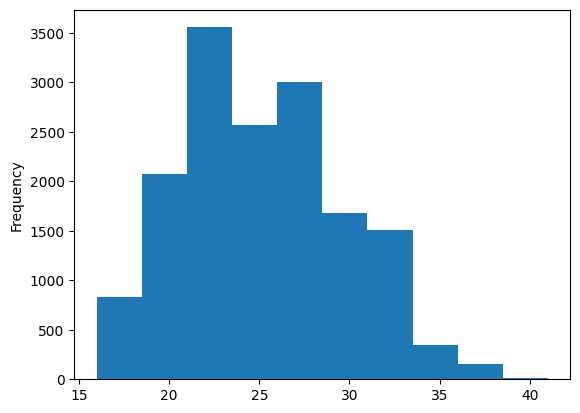

In [18]:
print(df_clean.Age.agg(['mean', 'min', 'max',]))
df_clean.Age.plot(kind='hist')

####EXPLANATION
The histogram above visualizes the distribution of player ages in the dataset.
It shows the frequency of players within different age ranges.
The x-axis represents the age, and the y-axis represents the number of players in each age group.
We can observe that the majority of the players are in the age range of 20 to 28
There are fewer players in the older age categories (above 30), and the distribution seems to follow a roughly normal or slightly right-skewed pattern
A 'right-skewed' distribution means that the tail of the distribution is longer on the right side, and the bulk of the data is concentrated on the left side.
In the context of the age distribution, it implies that there are more younger players in the dataset compared to older players.
While the distribution may not be perfectly normal (bell-shaped), it leans towards a normal distribution with a slight elongation on the right side due to the presence of fewer older players.


,count
Nationality,
Liberia,2
Ethiopia,2
El Salvador,2
Bolivia,2
Cuba,2
Mauritania,2
Kuwait,2
Chad,2
New Caledonia,2


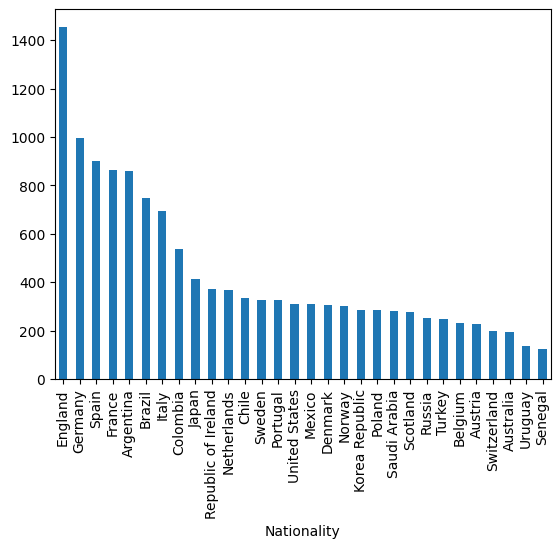

In [19]:
df_clean.Nationality.value_counts().head(30).plot(kind='bar')
df_clean.Nationality.value_counts().tail(30)

In [20]:
df_clean[df_clean["Nationality"].isin(["England", "Germany", "Spain","France","Italy","Argentina","Portugal","Sweden","netherlands"])].shape

(6424, 77)

####EXPLANATION
Players of nationalaity England predominate in this competition
Also the manjority of the players are European. Which represents more than 6424 players out of 17981 all over the world.

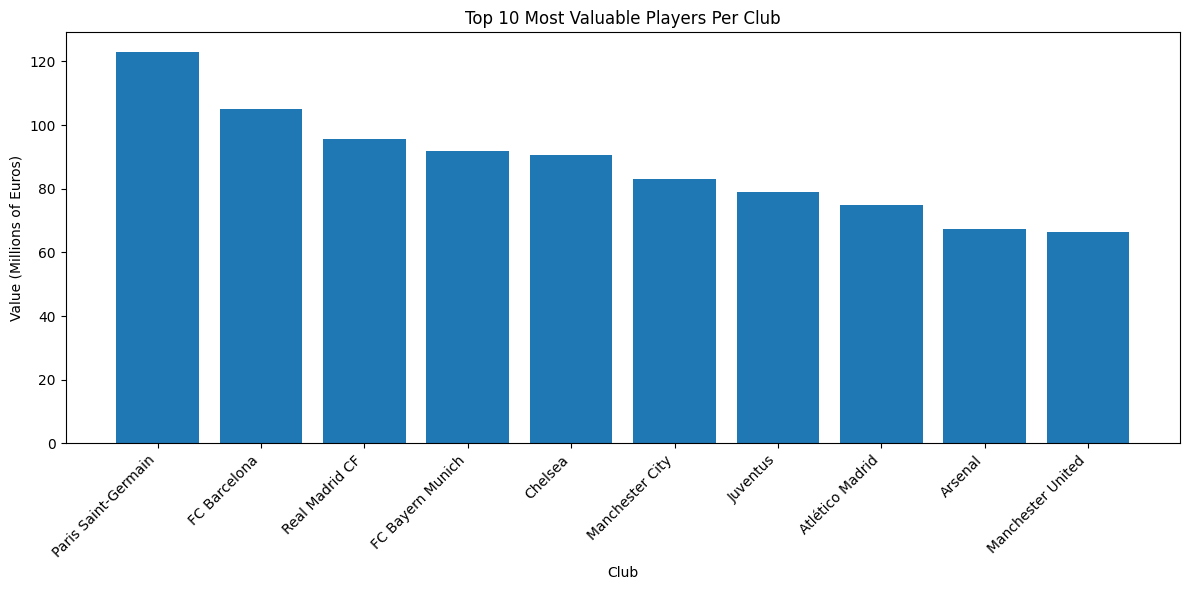

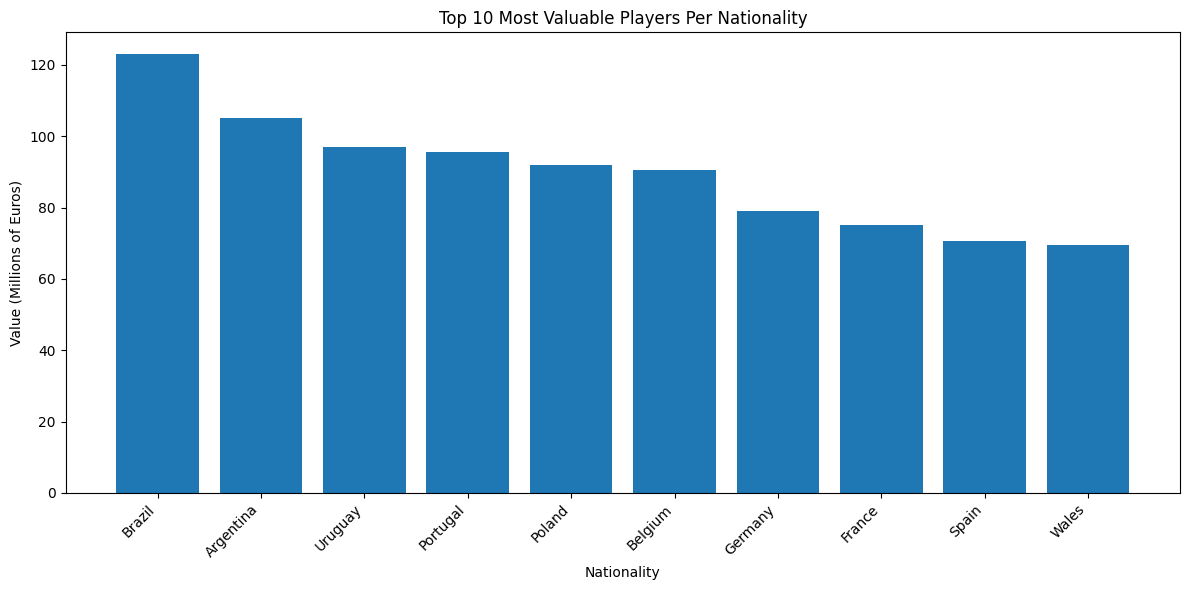

In [21]:
# prompt: lot the most valuable players per club and per Nationality

# Group by club and get the maximum value for each club
most_valuable_per_club = df_clean.groupby('Club')['Value(Millons of Euro)'].max()

# Sort by value in descending order to get the most valuable players
most_valuable_per_club = most_valuable_per_club.sort_values(ascending=False)

# Plot the top 10 most valuable players per club
plt.figure(figsize=(12, 6))
plt.bar(most_valuable_per_club.index[:10], most_valuable_per_club.values[:10])
plt.xlabel('Club')
plt.ylabel('Value (Millions of Euros)')
plt.title('Top 10 Most Valuable Players Per Club')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Group by Nationality and get the maximum value for each Nationality
most_valuable_per_nationality = df_clean.groupby('Nationality')['Value(Millons of Euro)'].max()

# Sort by value in descending order to get the most valuable players
most_valuable_per_nationality = most_valuable_per_nationality.sort_values(ascending=False)

# Plot the top 10 most valuable players per Nationality
plt.figure(figsize=(12, 6))
plt.bar(most_valuable_per_nationality.index[:10], most_valuable_per_nationality.values[:10])
plt.xlabel('Nationality')
plt.ylabel('Value (Millions of Euros)')
plt.title('Top 10 Most Valuable Players Per Nationality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [22]:
most_valuable_per_nationality

,Value(Millons of Euro)
Nationality,
Brazil,123.00
Argentina,105.00
Uruguay,97.00
Portugal,95.50
Poland,92.00
...,...
Philippines,0.29
Puerto Rico,0.26
Brunei Darussalam,0.19


In [23]:
most_valuable_per_club

,Value(Millons of Euro)
Club,
Paris Saint-Germain,123.00
FC Barcelona,105.00
Real Madrid CF,95.50
FC Bayern Munich,92.00
Chelsea,90.50
...,...
Bohemian FC,0.30
Galway United,0.28
Finn Harps,0.28


In [24]:
df_clean.loc[df_clean['Value(Millons of Euro)']==123.0]

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RCM,RDM,RF,RM,RS,RW,RWB,ST,Value(Millons of Euro),Wage (Millier Euro)
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,123.0,280.0


The most valuable player in 2018 is Neymar who was playing in PSG from Bresil


### The most expensive club in 2018

,Value(Millons of Euro)
Club,
Real Madrid CF,792.200
FC Barcelona,692.000
FC Bayern Munich,681.350
Chelsea,607.435
Paris Saint-Germain,599.850


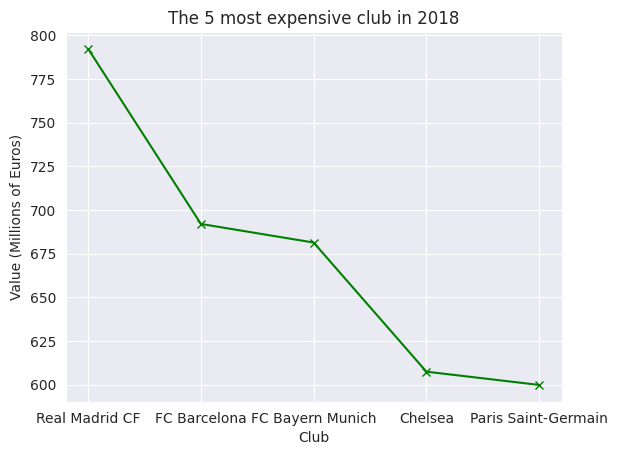

In [91]:
club_grp = df_clean.groupby('Club')
club_grp_mean = club_grp['Value(Millons of Euro)'].sum()
plt.plot(club_grp_mean.sort_values(ascending=False)[:5],marker='x',c='green');
plt.title('The 5 most expensive club in 2018')
plt.xlabel('Club')
plt.ylabel('Value (Millions of Euros)');
club_grp_mean.sort_values(ascending=False)[:5]

### The most expensive Country of players in 2018

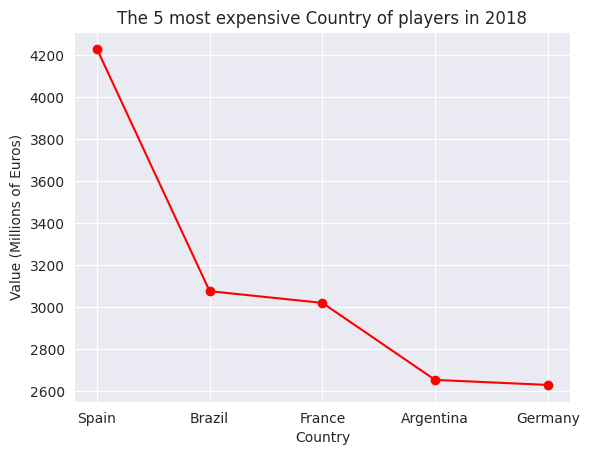

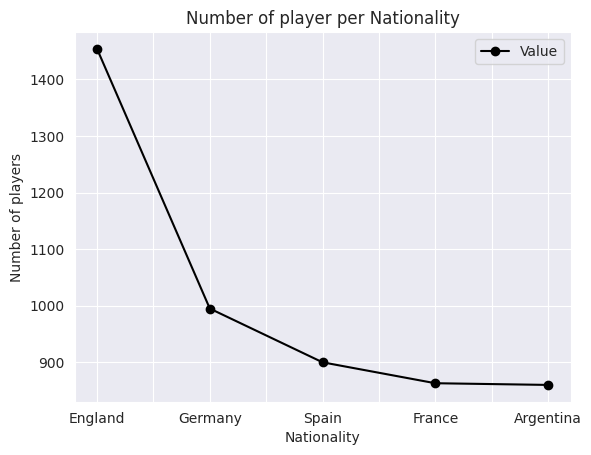

In [105]:
country_grp= df_clean.groupby('Nationality')
country_grp_mean = country_grp['Value(Millons of Euro)'].sum()
plt.plot(country_grp_mean.sort_values(ascending=False)[:5],marker='o',c='red');
plt.title('The 5 most expensive Country of players in 2018')
plt.xlabel('Country')
country_grp_mean.sort_values(ascending=False)[:5]
plt.ylabel('Value (Millions of Euros)');
plt.show();
plt.close()
# number of players per country
country_grp= df_clean.groupby('Nationality')
country_grp_count = country_grp['Value(Millons of Euro)'].count()
country_grp_count.sort_values(ascending=False)[:5]
country_grp_count.sort_values(ascending=False)[:5].plot(marker='o',c='black');
plt.title('Number of player per Nationality')
plt.ylabel('Number of players');
plt.show();
plt.close();

With these two graphs, we can understand that as the number of players growing, the value of the county is also growing except for **England where there are many players (400 more than Germany) but value of the country is not among the 5 valuable country**


**Brazil is the second more valuable country but the number of player is less than 900**.


> Let's deep into it to check the distibution of the value of the players in the most valuable countries



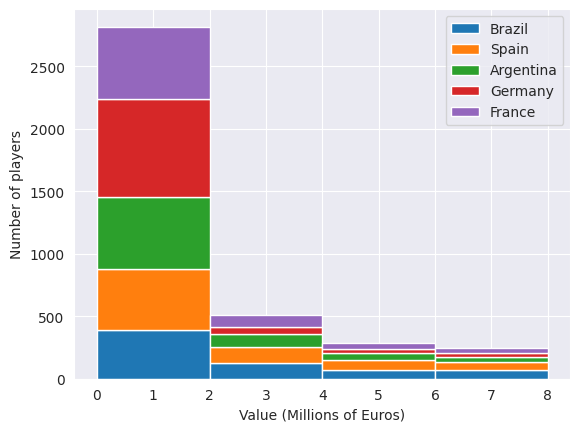

In [127]:
country_grp.get_group('Brazil').shape
plt.hist([country_grp.get_group('Brazil')['Value(Millons of Euro)'].sort_values(ascending=True),country_grp.get_group('Spain')['Value(Millons of Euro)'].sort_values(ascending=True),country_grp.get_group('Argentina')['Value(Millons of Euro)'].sort_values(ascending=True),country_grp.get_group('Germany')['Value(Millons of Euro)'].sort_values(ascending=True),country_grp.get_group('France')['Value(Millons of Euro)'].sort_values(ascending=True)],stacked=True,bins=np.arange(0,10,2));
plt.legend(['Brazil','Spain','Argentina','Germany','France'])
plt.xlabel('Value (Millions of Euros)')
plt.ylabel('Number of players');

EXPLANATION of the graph above:

 The graph presents a histogram comparing the distribution of player values
 (in millions of Euros) for the top 5 most valuable countries: Brazil, Spain,
 Argentina, Germany, and France.

 Each histogram bar represents a range of player values, and the height
 of the bar indicates the number of players within that specific range for each country.

**Observations:**

 1. Brazil:
   - Brazil shows a relatively high number of players in the 0-2 million Euro range.
   - Few players are in higher value brackets.
   - This indicates that a lot of players from Brazil have relatively low values
     compared to other countries.

 2. Spain and Argentina:
   - Both Spain and Argentina have similar distributions, with a visible number of players across various ranges, suggesting a mix of players with both lower and higher values.

 3. Germany and France:
   - Germany and France appear to have a higher concentration of players within the 0-2 million Euro bracket.
   - These countries also have fewer players in the higher-value ranges, similar to Brazil.


**Overall:**

 The graph illustrates that while some countries like Brazil, Germany, and France may have a larger player base, the concentration of players with high market values might be more prevalent in Spain and Argentina. This may suggest that these countries have a stronger talent pool at the top tier of football.

 **Further analysis could involve:**

 - Calculating the mean and median player values for each country.
 - Investigating which clubs from these countries have the highest-value players.
 - Examining the correlation between player value and other attributes within each country.

This type of comparison can provide insights into the economic and sporting influence of different nations in the context of the football market.


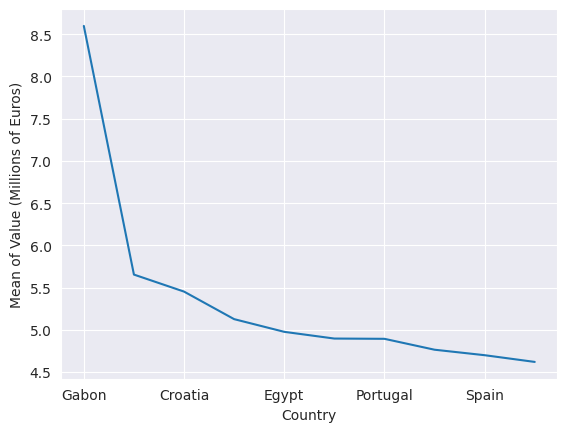

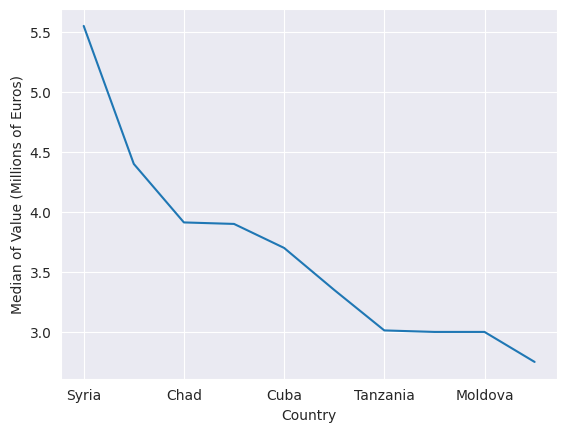

In [132]:
# Calculating the mean and median player values for each country.
country_grp_mean = country_grp['Value(Millons of Euro)'].mean()
country_grp_median = country_grp['Value(Millons of Euro)'].median()
country_grp_mean.sort_values(ascending=False)[:10].plot(kind='line')
plt.xlabel('Country')
plt.ylabel('Mean of Value (Millions of Euros)');
plt.show()
plt.close()
country_grp_median.sort_values(ascending=False)[:10].plot(kind='line')
plt.xlabel('Country')
plt.ylabel('Median of Value (Millions of Euros)');

### Correlation between the value of the player and his abilities


In [68]:
df_clean.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST', 'Value(Millons of Euro)',
       'Wage (Millier Euro)'],
      dtype='object')

In [75]:
df_clean['Penalties'].unique()

array([85., 74., 81., 86., 73., 70., 68., 77., 80., 76., 83., 50., 71.,
       75., 79., 46., 67., 91., 54., 64., 84., 59., 78., 69., 82., 60.,
       87., 63., 52., 33., 49., 57., 43., 66., 61., 72., 39., 56., 65.,
       62., 35., 45., 26., 41., 51., 53., 58., 38., 32., 31., 42., 44.,
       48., 55., 89., nan, 47., 40., 37., 92., 90., 88., 36., 27., 23.,
       34., 30., 29., 28., 14., 17., 20., 22., 19., 24., 13., 21., 18.,
       25., 12., 16., 15., 11.])

<Axes: xlabel='Value(Millons of Euro)', ylabel='Overall'>

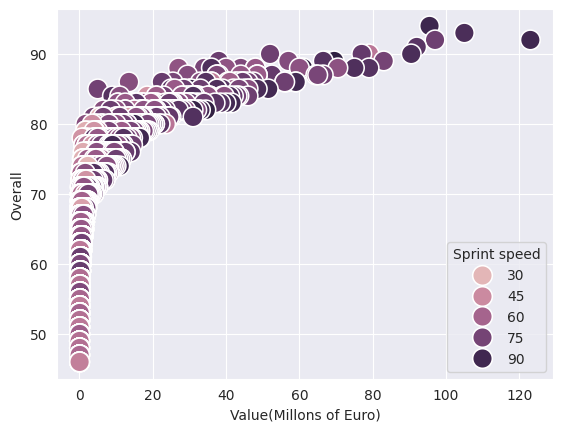

In [71]:
sns.scatterplot(data=df_clean, x='Value(Millons of Euro)', y='Overall', hue='Sprint speed',s=200)

This graph is showing the distibution of the players value regarding their overall attributes. Than classifies them by sprint speed.
We can understand from it that as the player's **overall attribute is high**, his **value is also higher**
And when it comes to take a look at their sprint speed, we can conclue that the player with a good overall [80-90] have a good sprint speed

Text(0, 0.5, 'Penalties & Finishing')

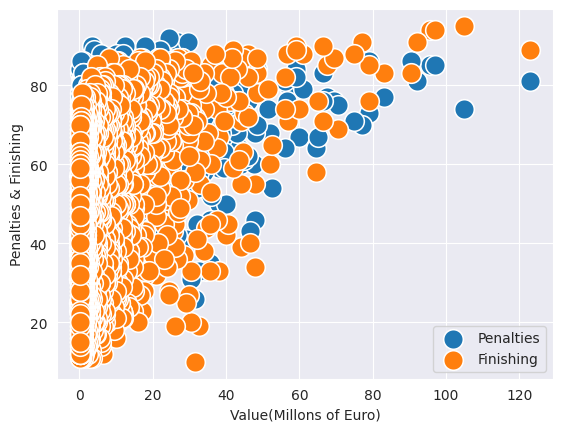

In [82]:
sns.scatterplot(data=df_clean,x="Value(Millons of Euro)",y='Penalties',s=200);

sns.scatterplot(data=df_clean,x="Value(Millons of Euro)",y='Finishing',s=200);
plt.legend(['Penalties','Finishing'])
plt.ylabel('Penalties & Finishing')

This graph shows that Both **Penalties** and **Finishing** skills don't have a strong corelation with the value of the player

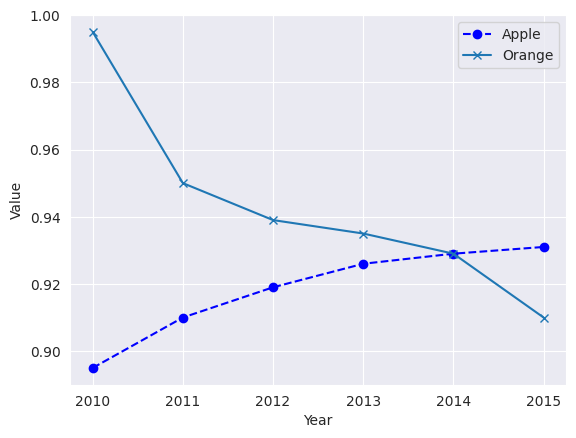

In [73]:
a= [0.895,0.91,0.919,0.926,0.929,0.931]
a2= [0.995,0.950,0.939,0.935,0.929,0.910]
b=[2010,2011,2012,2013,2014,2015]
plt.xlabel('Year')
plt.ylabel('Value')
plt.plot(b,a,'o--b');
plt.plot(b,a2,marker='x');
plt.legend(["Apple",'Orange'])

In [40]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


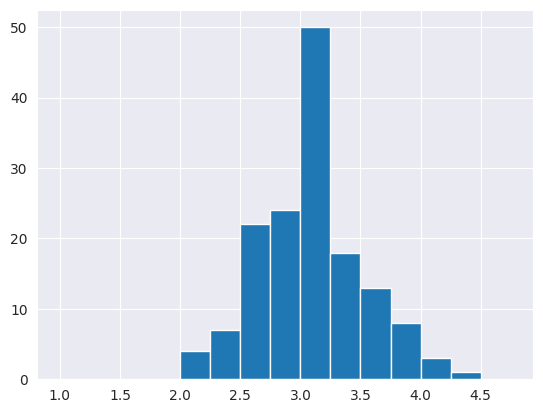

In [66]:
plt.hist(iris_data.sepal_width,bins=np.arange(1,5,0.25));

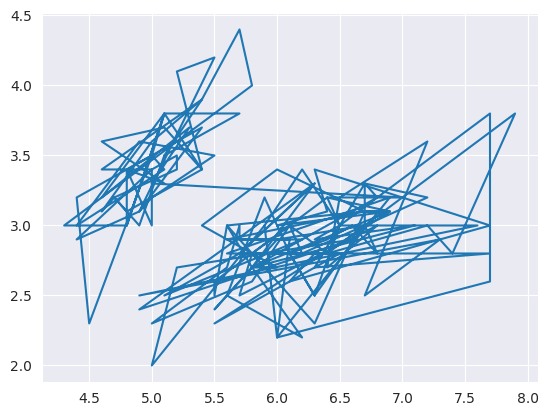

In [42]:
plt.plot(iris_data.sepal_length,iris_data.sepal_width)

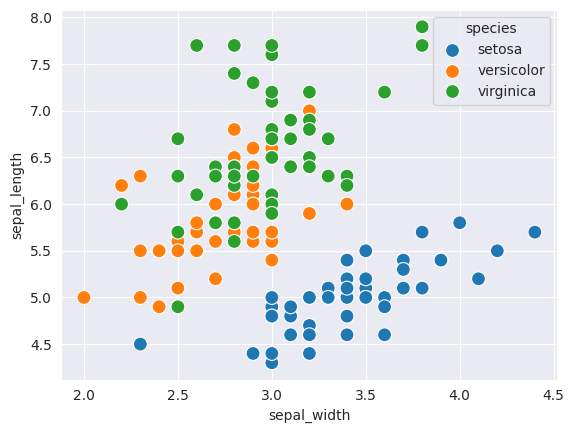

In [53]:
sns.scatterplot(x='sepal_width',y= 'sepal_length',hue='species',s=100,data=iris_data);
#sns.scatterplot(x=iris_data.sepal_width,y= iris_data.sepal_length,hue=iris_data.species,s=100);